In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np
import pandas as pd

from data_loader import data_loader
from gain import gain
from utils import rmse_loss

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# data = pd.read_csv("data/fdgs.csv")
# data.head()

In [3]:
# data.reg.replace(['North', 'East', 'South', 'West', 'City'],[0, 1,2,3,4], inplace=True)
# data.sex.replace(['boy', 'girl'],[0, 1], inplace=True)
# data = data.drop("Unnamed: 0",axis=1)
# data.head()

In [4]:
# data.to_csv("data/fdgs1.csv")

In [5]:
miss_rate=0.2 
gain_parameters = {'batch_size': 128,
                   'hint_rate': 0.9,
                   'alpha': 100,
                   'iterations': 10000}

In [6]:
ori_data_x, miss_data_x, data_m = data_loader("fdgs1", miss_rate)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from plotnine import ggplot, aes, geom_point,stat_smooth
%matplotlib inline

In [8]:
imputed_data_x = gain(miss_data_x, gain_parameters)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1031.12it/s]


In [9]:
col_names=["reg","age","sex","hgt","wgt"]

In [10]:
data_df = pd.DataFrame(data=ori_data_x,columns=col_names)
data_df.head()

,reg,age,sex,hgt,wgt
0,3.0,13.095140,0.0,175.5,75.0
1,3.0,13.817933,0.0,148.4,40.0
2,3.0,13.971253,0.0,159.9,42.0
3,3.0,13.982204,1.0,159.7,46.5
4,3.0,13.522245,1.0,160.3,47.8


In [11]:
miss_data_df = pd.DataFrame(data=miss_data_x,columns=col_names)
miss_data_df.head()

,reg,age,sex,hgt,wgt
0,3.0,13.095140,0.0,NaN,NaN
1,3.0,13.817933,0.0,148.4,40.0
2,3.0,13.971253,0.0,159.9,NaN
3,3.0,NaN,1.0,159.7,46.5
4,3.0,13.522245,NaN,160.3,47.8


In [12]:
imputed_data_df = pd.DataFrame(data=imputed_data_x,columns=col_names)
imputed_data_df.head()

,reg,age,sex,hgt,wgt
0,3.0,13.095140,0.0,157.223679,43.093334
1,3.0,13.817933,0.0,148.400000,40.000000
2,3.0,13.971253,0.0,159.900000,49.561159
3,3.0,14.186593,1.0,159.700000,46.500000
4,3.0,13.522245,0.0,160.300000,47.800000


In [13]:
imputed_data_df.sex.replace([0, 1],['boy', 'girl'], inplace=True)
imputed_data_df.reg.replace([0, 1,2,3,4],['North', 'East', 'South', 'West', 'City'], inplace=True)
data_df.sex.replace([0, 1],['boy', 'girl'], inplace=True)
data_df.reg.replace([0, 1,2,3,4],['North', 'East', 'South', 'West', 'City'], inplace=True)

In [14]:
# plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
# plt.style.use('classic')

def scott_pot(col):
    figure(figsize=(10, 8))
    miss_index = miss_data_df[miss_data_df[col].isna()].index
    impt_data = imputed_data_df.iloc[miss_index]
    data = data_df.iloc[miss_index]
    df = pd.DataFrame(data={"True":data[col],"GAIN":impt_data[col],"sex":data["sex"]})
    sns.scatterplot(data=df,x="True",y="GAIN",hue="sex");
#     plt.xlim


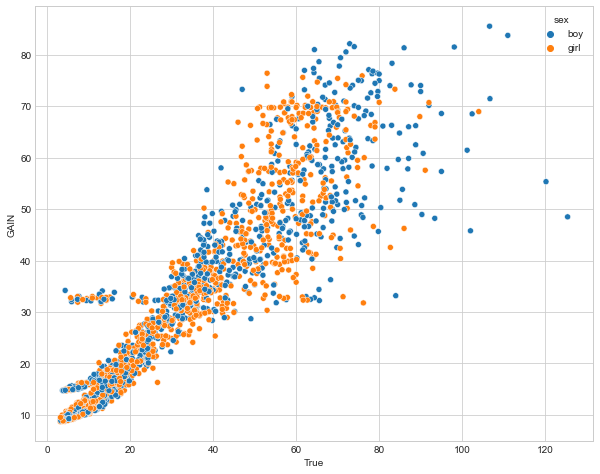

In [15]:
scott_pot('wgt')

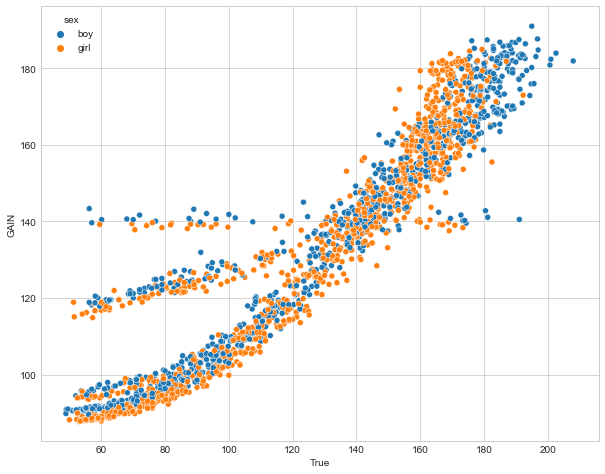

In [16]:
scott_pot('hgt')

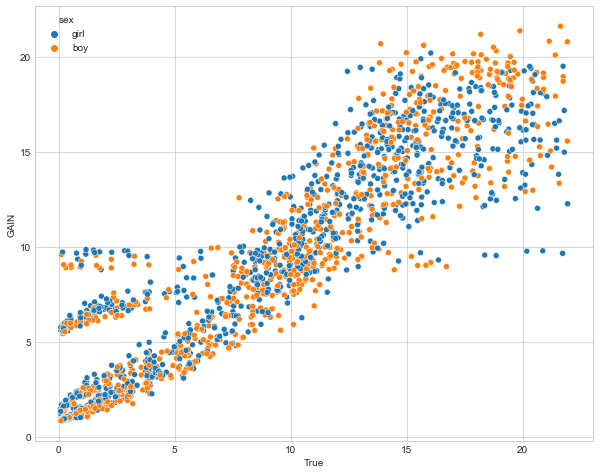

In [17]:
scott_pot('age')

In [18]:
na_count = miss_data_df.isnull().sum(axis=1)

In [19]:
miss_wgt_idx = miss_data_df[miss_data_df.wgt.isna()].index
impt_wgt = imputed_data_df.iloc[miss_wgt_idx].copy()
data_wgt = data_df.iloc[miss_wgt_idx].copy()

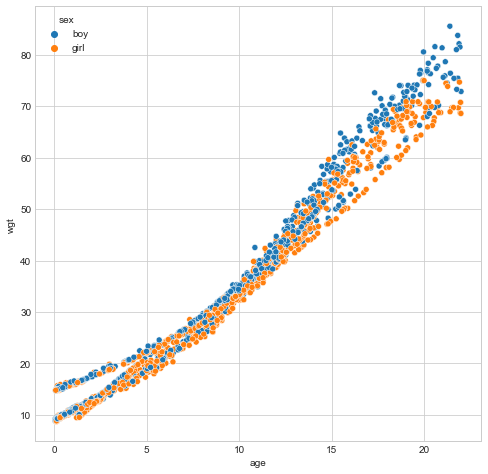

In [20]:
figure(figsize=(8, 8))
sns.scatterplot(data=impt_wgt,x="age",y="wgt",hue="sex");

In [21]:
impt_wgt["source"] ="GAIN"
impt_wgt["na_count"] = na_count.iloc[miss_wgt_idx].astype(str)
data_wgt['source']="True"
data_wgt['na_count']="True"
data= pd.concat([data_wgt,impt_wgt])

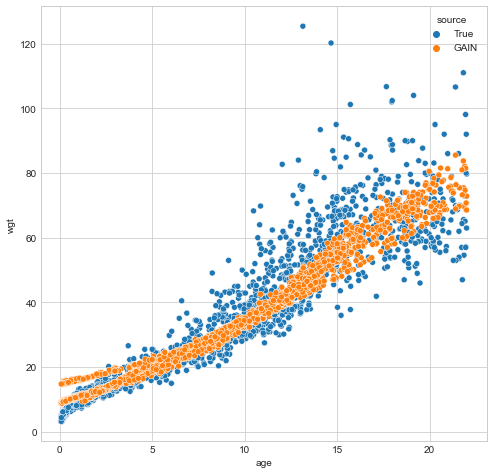

In [22]:
figure(figsize=(8, 8))
sns.scatterplot(data=data,x="age",y="wgt",hue="source");

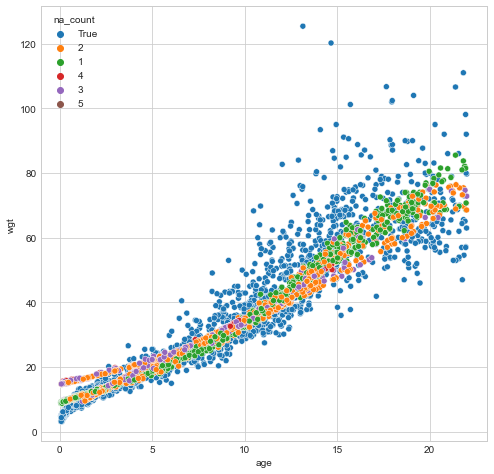

In [23]:
figure(figsize=(8, 8))
sns.scatterplot(data=data,x="age",y="wgt",hue="na_count");

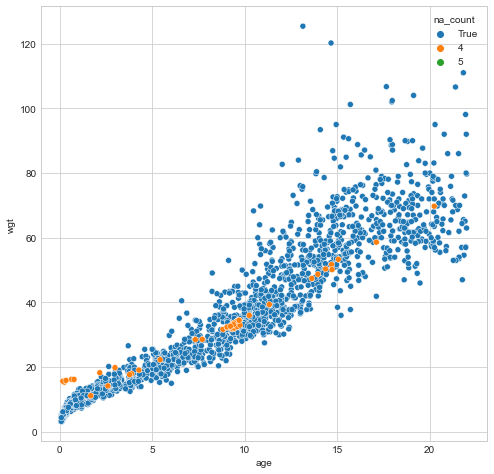

In [24]:
figure(figsize=(8, 8))
sns.scatterplot(data=data.loc[data.na_count.isin(["True","4",'5'])],x="age",y="wgt",hue="na_count");

In [25]:
# df = data.loc[data.na_count.isin(["True",'4','5'])]
# # df.na_count.astype(str)
# ggplot(df) + aes(x="age", y="wgt",colour ="na_count") + geom_point(alpha=0.4)+stat_smooth()

In [26]:
miss_hgt_idx = miss_data_df[miss_data_df.hgt.isna()].index
impt_hgt = imputed_data_df.iloc[miss_hgt_idx].copy()
data_hgt = data_df.iloc[miss_hgt_idx].copy()

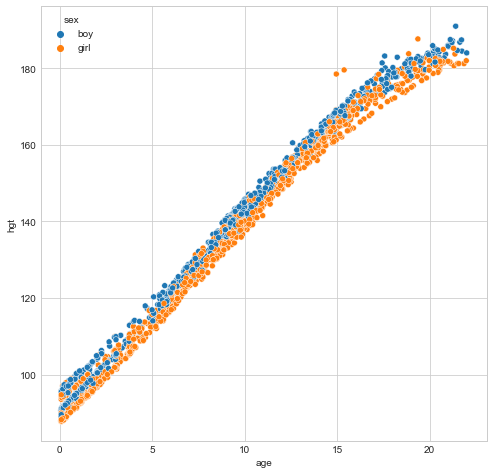

In [27]:
figure(figsize=(8, 8))
sns.scatterplot(data=impt_hgt,x="age",y="hgt",hue="sex");

In [28]:
impt_hgt["source"] ="GAIN"
impt_hgt["na_count"] = na_count.iloc[miss_wgt_idx].astype(str)
data_hgt['source']="True"
data_hgt['na_count']="True"
data= pd.concat([data_hgt,impt_hgt])

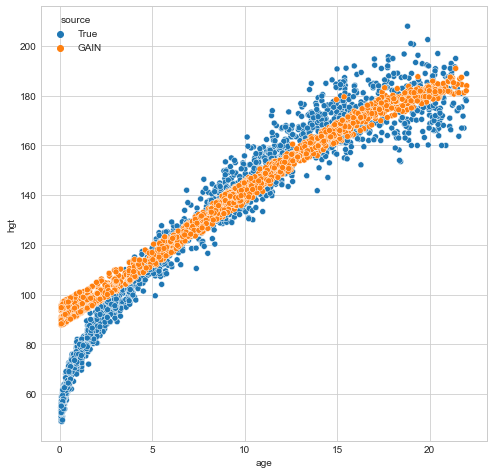

In [29]:
figure(figsize=(8, 8))
sns.scatterplot(data=data,x="age",y="hgt",hue="source");

In [30]:
# ggplot(data) + aes(x="age", y="hgt",colour ="source") + geom_point(alpha=0.4)+stat_smooth()

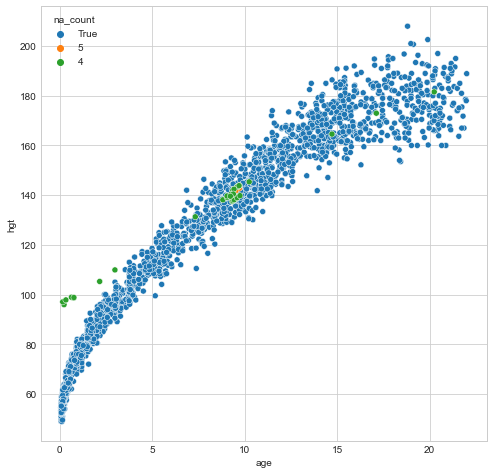

In [31]:
figure(figsize=(8, 8))
sns.scatterplot(data=data.loc[data.na_count.isin(["True","4",'5'])],x="age",y="hgt",hue="na_count");